In [6]:
from spectral_cube import SpectralCube
from astropy import units as u

In [2]:
cd /orange/adamginsburg/brick_alma_linesurvey/2019.1.00092.S/imaging_results/

/orange/adamginsburg/brick_alma_linesurvey/2019.1.00092.S/imaging_results


In [3]:
cube = SpectralCube.read('source_ab_87_spw102_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image')

/orange/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


In [4]:
cube

DaskVaryingResolutionSpectralCube with shape=(1920, 512, 512) and unit=Jy / beam and chunk size (80, 256, 512):
 n_x:    512  type_x: RA---SIN  unit_x: deg    range:   266.528130 deg:  266.560501 deg
 n_y:    512  type_y: DEC--SIN  unit_y: deg    range:   -28.719152 deg:  -28.690763 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 85551577967.789 Hz:87425349542.806 Hz

In [21]:
# NH2D - deuterated ammonia
vcen = 40*u.km/u.s
slab = cube.with_spectral_unit(u.km/u.s, rest_value=85.926278*u.GHz, velocity_convention='radio').spectral_slab(vcen-60*u.km/u.s, vcen+60*u.km/u.s).to(u.K)

In [22]:
slab

DaskVaryingResolutionSpectralCube with shape=(37, 512, 512) and unit=K and chunk size (37, 512, 512):
 n_x:    512  type_x: RA---SIN  unit_x: deg    range:   266.528130 deg:  266.560501 deg
 n_y:    512  type_y: DEC--SIN  unit_y: deg    range:   -28.719152 deg:  -28.690763 deg
 n_s:     37  type_s: VRAD      unit_s: km / s  range:      -21.311 km / s:     101.331 km / s

In [13]:
m0 = slab.moment0(axis=0)

/orange/adamginsburg/repos/radio-beam/radio_beam/multiple_beams.py:265: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


In [15]:
np.unravel_index(np.nanargmax(m0), m0.shape)

(256, 256)

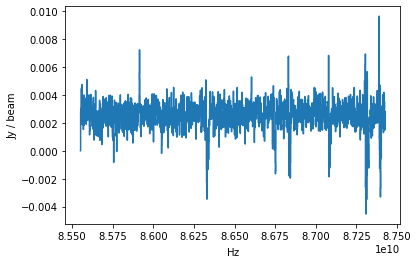

In [16]:
cube[:,256,256].quicklook()

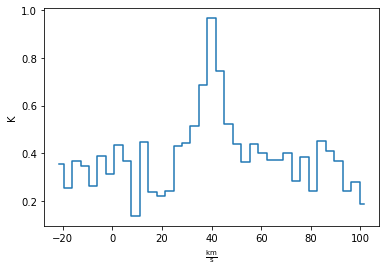

In [23]:
slab[:,256,256].quicklook()